In [1]:
import os
import rasterio
import fiona
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create path to data directory, make sure it exists
data_dir = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir),"Data")
assert os.path.isdir

In [10]:
# Define paths to image file and shape files + make sure it exists
imgf = os.path.join(data_dir, "PDX_DEM_WGS84_UTM10N_Zm_INT16.tif")
assert os.path.isfile(imgf)

shpf = os.path.join(data_dir, "TriMet_BusRoutes_WGS84_UTM10N.shp")
assert os.path.isfile(shpf)

In [11]:
# Lets find the elevation for each point in a line from the
# bus route shapefiles

# Open the shape
shp = fiona.open(shpf, 'r')

# Save line coordinates to a variable -- remember this will be a list 
# of tuples - for now lets leave it that way
line_points = shp[0]['geometry']['coordinates']

In [12]:
# Open the raster
img = rasterio.open(imgf, 'r')

# Read the first (and only) band of the image into a numpy array
dem = img.read(1)

In [13]:
# First lets query one line point in the array
# Remember, if we multiply the inverse of a RASTERIO geotransform 
# by a points coordinates, we are returned the (cols, rows) of the array
x, y = line_points[0]
print(x, y)
~img.transform * (x, y)


525345.3080198849 5041202.045433829


(3445.2088283737758, 1280.6911808897858)

In [14]:
# we can use the above values to query the array
print(dem[3445, 1280]) #WRONG - We transposed the cols/rows
print(dem[1280, 3445]) #CORRECT - Numpy indexing is [rows, cols] for a 2D array

101
10


In [20]:
eles = []
for i, pt in enumerate(line_points):
    x, y = line_points[i]
    
    c, r = ~img.transform * (x, y)
    ele = dem[int(r), int(c)]
    eles.append(ele)
    

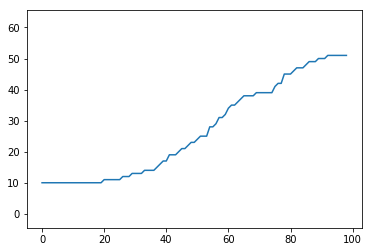

In [24]:
plt.plot(eles)
plt.axis('equal')
plt.show()